<a href="https://colab.research.google.com/github/franconoronha/treinamento-h2ia/blob/main/7_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado de Máquina Não-Supervisionado
## Clusterização com kmeans

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [104]:
url = 'https://raw.githubusercontent.com/franconoronha/treinamento-h2ia/main/iris.csv'
dataset = pd.read_csv(url)
dataset.drop(columns='label', inplace=True)
dataset_array = dataset.to_numpy()
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


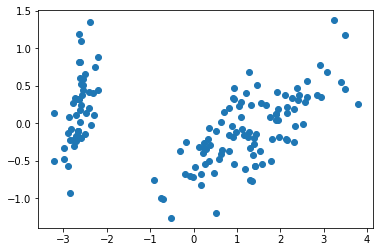

In [105]:
pca = PCA(n_components=2)
dataset_plot = pca.fit_transform(dataset_array)

plt.scatter(dataset_plot[:,0], dataset_plot[:,1])

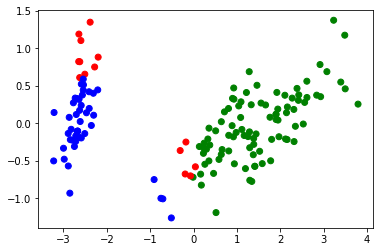

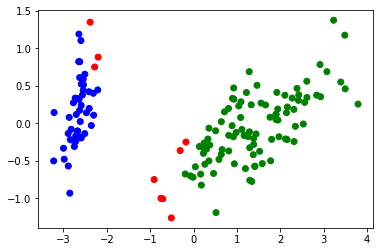

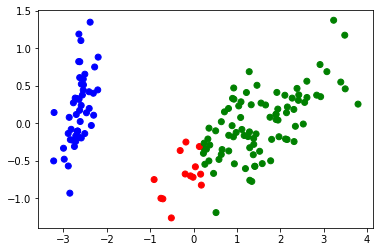

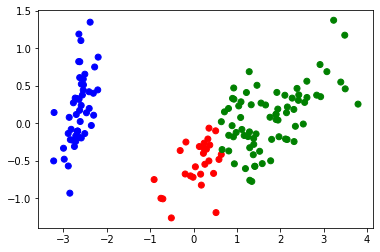

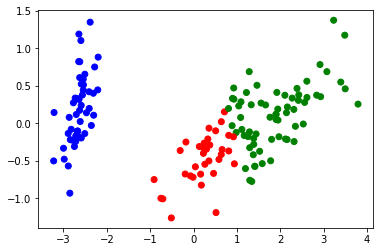

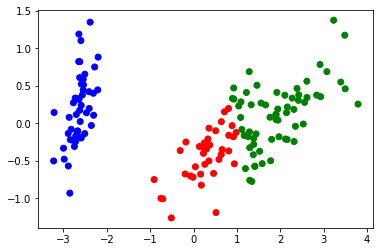

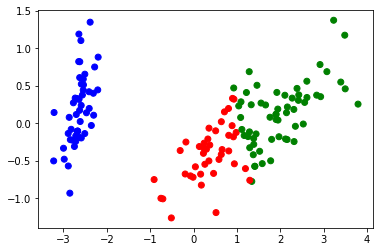

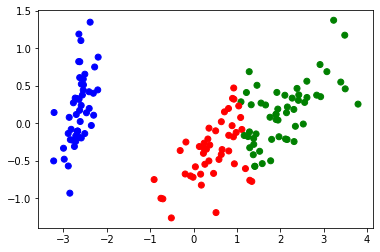

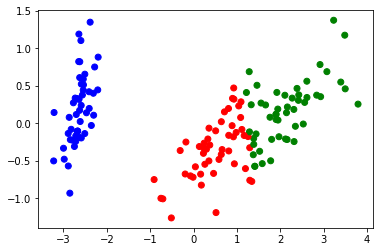

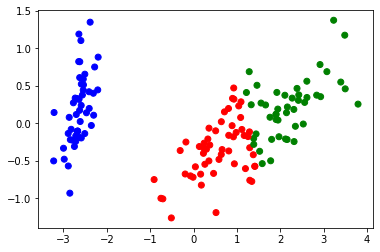

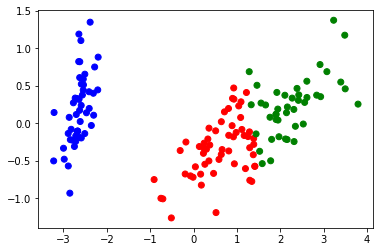

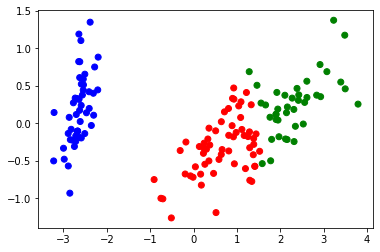

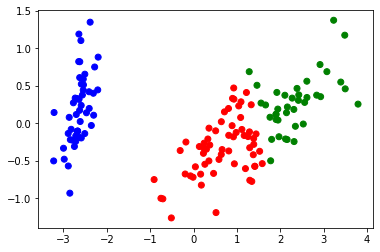

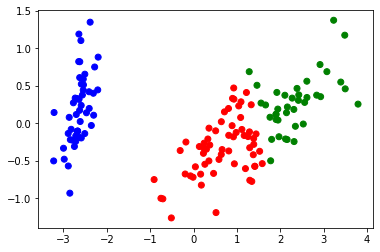

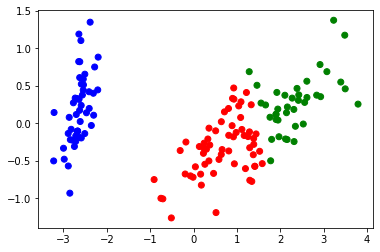

In [106]:
def distancia_euclidiana(a,b):
  return np.sqrt(np.square(a - b).sum())

K = 3
cores = ["red", "green", "blue", "yellow", "purple"]

def classificacao(data, centroids):
  wcss = 0
  classificacoes = []
  for p in data:
    dists = []
    for c in centroids:
      dists.append(distancia_euclidiana(p, c))

    centroid_id = np.argmin(dists)
    classificacoes.append(centroid_id)
    wcss += dists[centroid_id] ** 2

  return classificacoes, wcss

def reajuste(classificacoes, centroids_atuais):
  clusters = []
  novos_centroids = []
  for i in range(0, K):
    clusters.append([])

  for i, c in enumerate(classificacoes):
    clusters[c].append(dataset_array[i])

  for i, c in enumerate(clusters):
    c = np.array(c)
    if len(c):
      centroid = np.array([np.mean(c[:,x]) for x in range(0, 4)])
      novos_centroids.append(centroid)
    else:
      novos_centroids.append(centroids_atuais[i])

  return np.array(novos_centroids)

def kmeans(K):
  wcss = 0
  antigo_wcss = 1
    # Inicialização aleatória dentro do dataset
  rows = np.random.choice(range(dataset_array.shape[0]), size = K, replace = False)
  centroids = dataset_array[rows,:]

    # Inicialização de pontos aleatórios fora do dataset (não foi muito bom)
  ''' maxes = [np.max(dataset_array[:,x]) for x in range(0, 4)]
  centroids = []
  for i in range(0, K):
    centroids.append([np.random.uniform(0, x) for x in maxes]) '''

  while wcss != antigo_wcss:
    antigo_wcss = wcss
    classificacoes, wcss = classificacao(dataset_array, centroids)
    centroids = reajuste(classificacoes, centroids)

    cores_scatter = [cores[x] for x in classificacoes]
    plt.scatter(dataset_plot[:,0], dataset_plot[:,1], c = cores_scatter)
    plt.show()

  return centroids

fit_centroids = kmeans(K)